In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import os
import pickle
from mix_Network import *

%mkdir -p ../Records
%mkdir -p ../Records/EXP_01_LagorceKmeans

# Test of homeostasis rule on Lagorce 2017 results

In [3]:
homhots = network(algo='lagorce', krnlinit='first', tau=20, homeo=True)
homhots.learninglagorce(diginit=True)

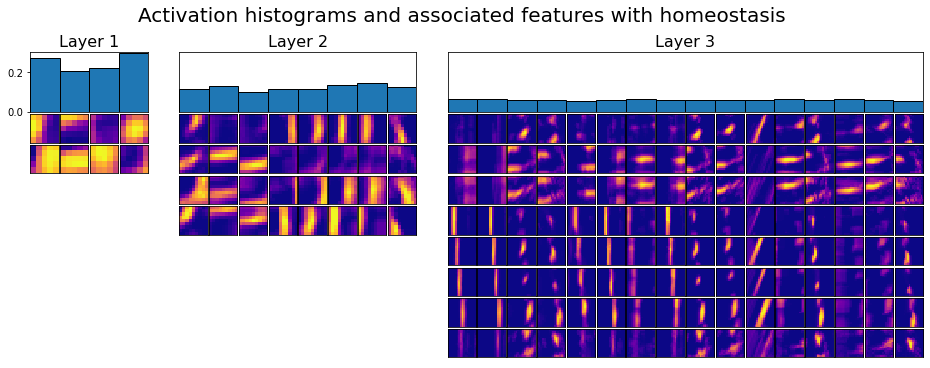

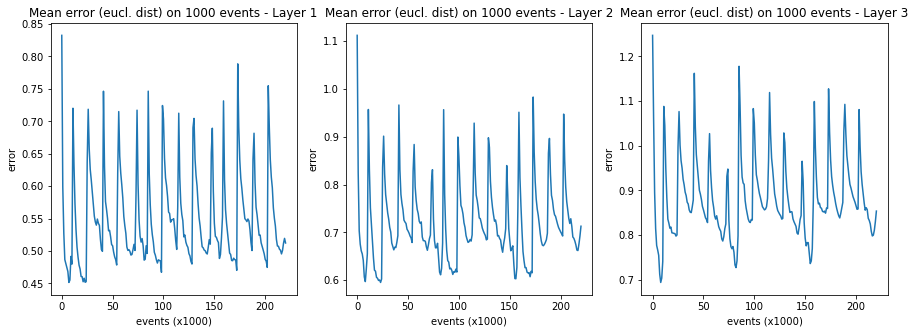

In [4]:
homhots.plotlayer()
homhots.plotconv()

In [5]:
trainmap = homhots.traininglagorce()

In [6]:
testmap = homhots.testinglagorce(trainmap)


bhatta:97.5% - eucli:97.5% - norm:97.5%


In [7]:
fname = "../Records/EXP_01_LagorceKmeans/2020-12-01-mix_hots_homeo.pkl"
with open(fname, 'wb') as file:
    pickle.dump([homhots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)

# Random initialisation

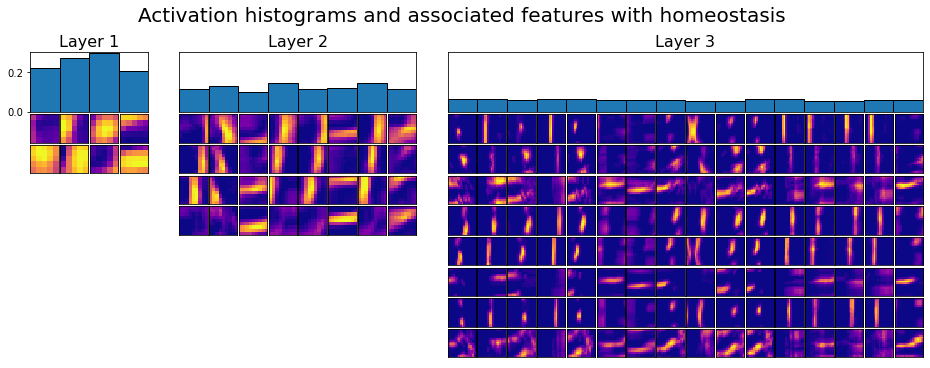


bhatta:100.0% - eucli:100.0% - norm:100.0%


In [8]:
fname = "../Records/EXP_01_LagorceKmeans/2020-12-01-mix_hots_homeo_randominit.pkl"
if not os.path.isfile(fname):
    homhotsrdn = network(algo='lagorce', krnlinit='rdn', tau=20, homeo=True)
    homhotsrdn.learninglagorce()
    homhotsrdn.plotlayer()
    trainmaprdnhom = homhotsrdn.traininglagorce()
    testmaprdnhom = homhotsrdn.testinglagorce(trainmaprdnhom)
    with open(fname, 'wb') as file:
        pickle.dump([homhotsrdn, trainmaprdnhom, testmaprdnhom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        homhotsrdn, trainmaprdnhom, testmaprdnhom = pickle.load(file)
    homhotsrdn.plotlayer()